In [1]:
import torch
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
import os
import numpy as np
import os.path as osp
import json
from tqdm import tqdm
from PIL import Image

In [3]:
from utils import Config

In [32]:
class pet_dataset:
    def __init__(self):
        self.root_dir = Config['root_path']
        self.image_dir = osp.join(self.root_dir, 'test')
        self.transforms = self.get_data_transforms()


    def get_data_transforms(self):
        data_transforms = {
            'train': transforms.Compose([
                transforms.CenterCrop(100),
                transforms.ToTensor(),
                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
            ]),
            'test': transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
            ]),
        }
        return data_transforms

    # def create_dataset(self):
    def create_dataset(self):
        # image_dir = '/home/ubuntu/mycode/project/test'
        files = os.listdir(self.image_dir)
        meta_file = open('./toy.json', 'r')
        meta_json = json.load(meta_file)
        X = []; y = []
        for x in files:
            if x[:-4] in meta_json:
                print(x)
                X.append(x)
                y.append(int(meta_json[x[:-4]]))
        # y = LabelEncoder().fit_transform(y)
        # print('len of X: {}, # of outputs: {}'.format(len(X), max(y) + 1))
        print('len of X: {}'.format(len(X)))
        # split dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        return X_train, X_test, y_train, y_test, max(y) , min(y)



In [ ]:

# image_dir = '/home/ubuntu/mycode/project/test'
# files = os.listdir(image_dir)
# meta_file = open('./toy.json', 'r')
# meta_json = json.load(meta_file)
# meta_json
# X = []; y = []
# for x in files:
#     if x[:-4] in meta_json:
#         print(x)
#         X.append(x)
#         y.append(int(meta_json[x[:-4]]))

In [33]:
class pet_train(Dataset):
    def __init__(self, X_train, y_train, transform):
        self.X_train = X_train
        self.y_train = y_train
        self.transform = transform
        self.image_dir = osp.join(Config['root_path'], 'test')

    def __len__(self):
        return len(self.X_train)

    def __getitem__(self, item):
        file_path = osp.join(self.image_dir, self.X_train[item])
        # tempimg = self.transform(Image.open(file_path))
        return self.transform(Image.open(file_path)),self.y_train[item]
        # return tempimg,self.y_train[item]

In [37]:
class pet_test(Dataset):
    def __init__(self, X_test, y_test, transform):
        self.X_test = X_test
        self.y_test = y_test
        self.transform = transform
        self.image_dir = osp.join(Config['root_path'], 'test')


    def __len__(self):
        return len(self.X_test)


    def __getitem__(self, item):
        file_path = osp.join(self.image_dir, self.X_test[item])
        # tempimg = self.transform(Image.open(file_path))
        return self.transform(Image.open(file_path)),self.y_test[item]
        # return tempimg,self.y_train[item]

In [ ]:
def get_dataloader(debug, batch_size, num_workers):
    dataset = pet_dataset()
    transform = dataset.get_data_transforms()
    X_train, X_test, y_train, y_test, biggest,smallest = dataset.create_dataset()

    if debug==True:
        train_set = pet_train(X_train[:1000], y_train[:1000], transform['train'])
        test_set = pet_test(X_test[:1000], y_test[:1000], transform['test'])
        dataset_size = {'train': 1000, 'test': 1000}
    else:
        train_set = pet_train(X_train, y_train, transform['train'])
        test_set = pet_test(X_test, y_test, transform['test'])
        dataset_size = {'train': len(y_train), 'test': len(y_test)}

    datasets = {'train': train_set, 'test': test_set}
    dataloaders = {x: DataLoader(datasets[x],
                                 shuffle=True if x=='train' else False,
                                 batch_size=batch_size,
                                 num_workers=num_workers)
                                 for x in ['train', 'test']}
    return dataloaders, biggest, dataset_size,smallest

In [38]:
# dataset = pet_dataset()
# transform = dataset.get_data_transforms()
# X_train, X_test, y_train, y_test, biggest, smallest = dataset.create_dataset()


8f49844c382931444e68dffbe20228f4.jpg
4e429cead1848a298432a0acad014c9d.jpg
len of X: 2


In [39]:
# train_set= pet_train(X_train[:1], y_train[:1], transform['train'])

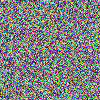

In [40]:
# train_set[0][0]